In [36]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DFKai-SB' #顯示中文(for Win10)，可自行更換可用字體
plt.rcParams['axes.unicode_minus']=False #正常顯示負號
%matplotlib inline

In [58]:
img = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)

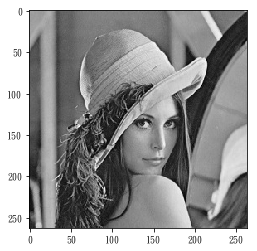

In [59]:
plt.imshow(img, 'gray')

## Sobel運算子

In [60]:
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

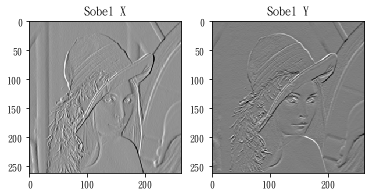

In [61]:
plt.subplot(121)
plt.title('Sobel X')
plt.imshow(sobel_x, 'gray')
plt.subplot(122)
plt.title('Sobel Y')
plt.imshow(sobel_y, 'gray')

In [62]:
#負數會變為0，所以需取絕對值
sobel_absx = cv2.convertScaleAbs(sobel_x)
sobel_absy = cv2.convertScaleAbs(sobel_y)

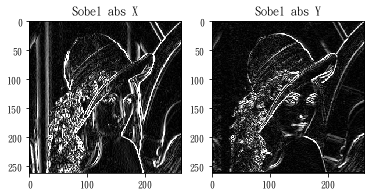

In [63]:
plt.subplot(121)
plt.title('Sobel abs X')
plt.imshow(sobel_absx, 'gray')
plt.subplot(122)
plt.title('Sobel abs Y')
plt.imshow(sobel_absy, 'gray')

In [64]:
#直接計算dx、dy
sobel_xy = cv2.Sobel(img, cv2.CV_64F, 1,1, ksize=3)
sobel_absxy_dir = cv2.convertScaleAbs(sobel_xy)

#個別做完dx,dy再相加
sobel_absxy_sep = cv2.addWeighted(sobel_absx,0.5,sobel_absy,0.5,0)

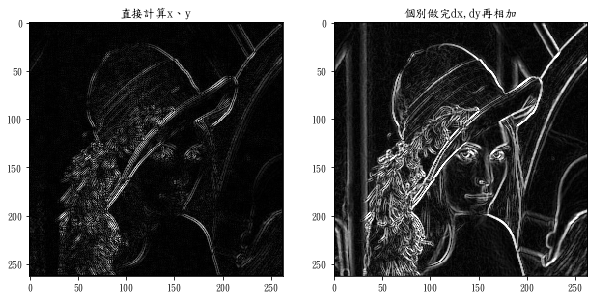

In [65]:
plt.figure(figsize=(10,8))
plt.subplot(121)
plt.title('直接計算x、y')
plt.imshow(sobel_absxy_dir, 'gray')
plt.subplot(122)
plt.title('個別做完dx,dy再相加')
plt.imshow(sobel_absxy_sep, 'gray')

## Scharr運算子

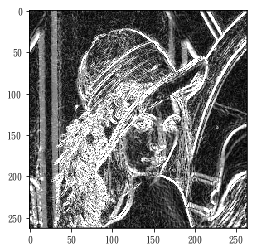

In [72]:
scharr_x = cv2.convertScaleAbs(cv2.Scharr(img, cv2.CV_64F, 1,0))
scharr_y = cv2.convertScaleAbs(cv2.Scharr(img, cv2.CV_64F, 0,1))
scharr_xy = cv2.addWeighted(scharr_x,0.5,scharr_y,0.5,0)
plt.imshow(scharr_xy, 'gray')

## Laplacian運算子

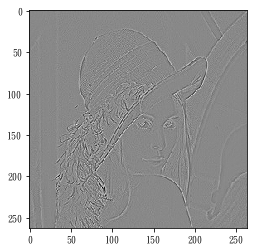

In [76]:
laplacian = cv2.Laplacian(img, cv2.CV_64F)
plt.imshow(laplacian, 'gray')

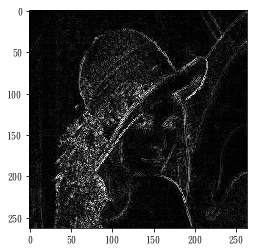

In [78]:
laplacian_abs = cv2.convertScaleAbs(laplacian)
plt.imshow(laplacian_abs, 'gray')

In [95]:
img_merge = np.hstack((sobel_absxy_dir, sobel_absxy_sep, scharr_xy, laplacian_abs))

sobel直接計算dx、dy, sobel分別計算dx、dy再相加, scharr較sobel敏感, laplacian


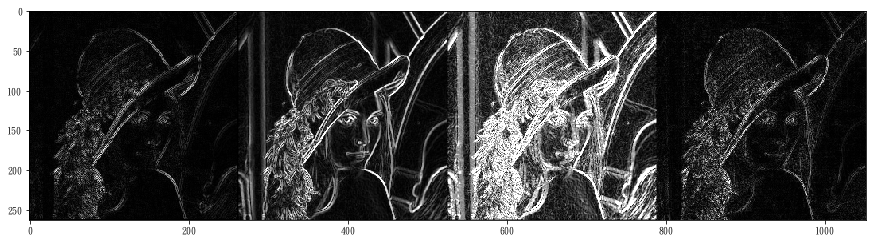

In [102]:
print('sobel直接計算dx、dy, sobel分別計算dx、dy再相加, scharr較sobel敏感, laplacian')
plt.figure(figsize=(15,8))
plt.imshow(img_merge,'gray')
plt.show()

## Canny邊緣檢測

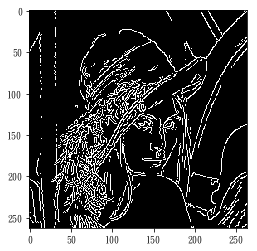

In [106]:
img_canny = cv2.Canny(img, 80,150)
plt.imshow(img_canny, 'gray')

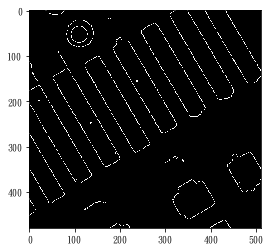

In [111]:
img2 = cv2.imread('pcb.jpg', cv2.IMREAD_GRAYSCALE)
img_canny = cv2.Canny(img2, 120,250)
plt.imshow(i)
plt.imshow(img_canny, 'gray')